# Deep Learning Project

Goal to achieve -  Forecast the sales volume of different products for an Online retailer over a week into the future.

Team Members: Ananya Neogi, Nupur Kulkarni and Rishika Dhar

## FLOWCHART

This notebook would provide a step-by-step assessment of the dataset including some data pre-processing, some descriptive analytics(EDA) and finally the model built and its operation.

Step 1: Libraries are imported.

In [1]:

import os
import numpy as np
import pandas as pd
import sklearn as sk
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Step 2: Read the datasets into two dataframes using the pandas 'read_csv' function.

In [2]:

os.chdir("/Users/ananyaneogi/Desktop/FS-SECOND SEM/Deep learning Project/Homework_Assignment")
df1 = pd.read_csv('solditems_encoded_stage2.csv')
df2 = pd.read_csv('content_encoded_stage2.csv')


Step 3: The two dataframes read above are now inspected in the following steps. The data distribution, shapes are inspected first. Then the 'created_date_id' field is converted to a datetime object and a separate column known as the sales volume per year for each products which is our target variable is calculated and added to the first dataframe.

Additionally since we focus on only four Manufacturers for our analysis, the necessary ones are kept and the other redundant columns are dropped from the second dataframe.

In [3]:

print("Solid Item dataframe shape :", df1.shape)
print("Solid Item dataframe columns :",df1.columns)
df1.head(5)

#A copy of the existing dataframe made for alteration purposes
df1_new = df1.copy()


# Type of the date id changed to datetime format
df1_new['created_date_id'] = pd.to_datetime(df1_new['created_date_id'])


# From the date id the date field is extracted for further grouping purposes
df1_new['year'] = df1_new['created_date_id'].dt.year
df1_new.head(5)
df1_new.groupby('product_sid').apply(lambda x: x.sort_values(['year'], ascending = True))


# Total units of product sold added to new column sales_volume 
df1_new['sales_vol_all'] = df1_new.groupby(['product_sid', 'year'])['year'].transform(np.size)
df1_new.head(10)

print("Content dataframe shape :", df2.shape)
print("Content dataframe columns :",df2.columns)
df2.describe()
pd.set_option('display.max_rows', 1000)

manufacturers_to_drop = ['Manufacturer_1','Manufacturer_2','Manufacturer_9','Manufacturer_4','Manufacturer_5',
                        'Manufacturer_6','Manufacturer_7','Manufacturer_8','Manufacturer_10','Manufacturer_11',
                        'Manufacturer_12','Manufacturer_13','Manufacturer_15','Manufacturer_16','Manufacturer_17',
                        'Manufacturer_18','Manufacturer_19','Manufacturer_20','Manufacturer_21','Manufacturer_22',
                        'Manufacturer_23','Manufacturer_24','Manufacturer_25','Manufacturer_26','Manufacturer_27',
                        'Manufacturer_28','Manufacturer_29','Manufacturer_30','Manufacturer_31','Manufacturer_32',
                        'Manufacturer_34','Manufacturer_35','Manufacturer_36','Manufacturer_37','Manufacturer_38',
                        'Manufacturer_39','Manufacturer_40','Manufacturer_41','Manufacturer_42','Manufacturer_43',
                        'Manufacturer_44','Manufacturer_45','Manufacturer_46','Manufacturer_47','Manufacturer_48',
                        'Manufacturer_49','Manufacturer_50','Manufacturer_51','Manufacturer_52','Manufacturer_53',
                        'Manufacturer_54','Manufacturer_55','Manufacturer_56','Manufacturer_57','Manufacturer_58',
                        'Manufacturer_59','Manufacturer_60','Manufacturer_61','Manufacturer_62','Manufacturer_63',
                        'Manufacturer_64','Manufacturer_65','Manufacturer_66','Manufacturer_67','Manufacturer_68',
                        'Manufacturer_69','Manufacturer_70','Manufacturer_71','Manufacturer_72','Manufacturer_73',
                        'Manufacturer_74']
df2 = df2.drop(manufacturers_to_drop, axis = 1)
df2.shape

count_rows = df2.apply(lambda x: True if x['Manufacturer_0'] or x['Manufacturer_3'] or x['Manufacturer_14'] or x['Manufacturer_33'] == 1 else False , axis=1)
num_rows = len(count_rows[count_rows == True].index)
print('Number of Rows where value is 1 for the manufacturers are: ', num_rows)

df2 = df2[df2['Manufacturer_0'] | df2['Manufacturer_3'] | df2['Manufacturer_14'] | df2['Manufacturer_33'] == 1] 
df2.shape



Solid Item dataframe shape : (547248, 22)
Solid Item dataframe columns : Index(['product_sid', 'created_date_id', 'sales_item_price_created',
       'sales_item_price', 'sales_voucher_created', 'sales_voucher',
       'sales_value_created', 'sales_value', 'created_year', 'created_month',
       'created_weekday', 'days_since_first_sold', 'days_since_release',
       'Ratio_SalesItemPrice_per_created', 'Ratio_SalesValue_per_created',
       'Ratio_SalesItemPrice_per_SalesValue',
       'Ratio_SalesItemPriceCreated_per_SalesValueCreated', 'channel_sid_0',
       'channel_sid_1', 'channel_sid_2', 'returned_date_id_0',
       'returned_date_id_1'],
      dtype='object')
Content dataframe shape : (3656, 848)
Content dataframe columns : Index(['ProductId', 'ProductNameCleaned', 'DisplaySize_in', 'Storage_GB',
       'ReleaseYear', 'ReleaseMonth', 'ReleaseDayOfWeek', 'CPUSpeed_GHz',
       'DisplayHeight_px', 'DisplayResolution_MP',
       ...
       'OS_5', 'OS_6', 'OS_7', 'OS_8', 'Radio_0',

(1132, 777)

Step 4: Finally, the two dataframes are merged into a third dataframe on the basis of the key which is the 'product_sid' and the 'ProductId' correspondingly from the two dataframes.

Additonally, a quick check for null values are made after the merge happens to avoid any unnecessary discrepancies.

In [4]:

df3 = pd.merge(df1_new, df2, left_on="product_sid", right_on="ProductId")
print(df3.head())
print(df3.shape)
pd.set_option('display.max_rows', 1000)
print(df3.isna().sum())

print(df3.describe())



   product_sid created_date_id  sales_item_price_created  sales_item_price  \
0          876      2013-01-01                  0.035745          0.035745   
1          876      2013-01-06                  0.035745          0.035745   
2          876      2013-01-11                  0.032123          0.032123   
3          876      2013-01-12                  0.032123          0.032123   
4          876      2013-01-14                  0.032123          0.032123   

   sales_voucher_created  sales_voucher  sales_value_created  sales_value  \
0                    1.0            1.0             0.038524     0.038524   
1                    1.0            1.0             0.038524     0.038524   
2                    1.0            1.0             0.034912     0.034912   
3                    1.0            1.0             0.034912     0.034912   
4                    1.0            1.0             0.037794     0.037794   

   created_year  created_month  ...  OS_5  OS_6  OS_7  OS_8  Radio_0

         product_sid  sales_item_price_created  sales_item_price  \
count  438763.000000             438763.000000     438763.000000   
mean     1843.400996                  0.211068          0.211067   
std       743.946143                  0.112266          0.112265   
min         0.000000                  0.000000          0.000000   
25%      1310.000000                  0.128476          0.128476   
50%      1956.000000                  0.195126          0.195126   
75%      2474.000000                  0.274099          0.274099   
max      3649.000000                  1.000000          1.000000   

       sales_voucher_created  sales_voucher  sales_value_created  \
count          438763.000000  438763.000000        438763.000000   
mean                0.999116       0.999050             0.212611   
std                 0.005745       0.006162             0.111903   
min                 0.000000       0.000000             0.000000   
25%                 1.000000       1.000000    

Normalizing the sales volume column as generated above.

In [5]:
from sklearn import preprocessing
y = df1_new[['sales_vol_all']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
y_scaled = min_max_scaler.fit_transform(y)

# Run the normalizer on the dataframe
df1_new['sales_vol_all'] = pd.DataFrame(y_scaled)

df1_new.head(5)

,product_sid,created_date_id,sales_item_price_created,sales_item_price,sales_voucher_created,sales_voucher,sales_value_created,sales_value,created_year,created_month,...,Ratio_SalesValue_per_created,Ratio_SalesItemPrice_per_SalesValue,Ratio_SalesItemPriceCreated_per_SalesValueCreated,channel_sid_0,channel_sid_1,channel_sid_2,returned_date_id_0,returned_date_id_1,year,sales_vol_all
0,621,2013-01-01,0.111813,0.111813,1.0,1.0,0.117255,0.117255,0.0,0.0,...,0.531667,0.002729,0.002729,1,0,0,1,0,2013,0.008749
1,621,2013-01-02,0.111813,0.111813,1.0,1.0,0.117255,0.117255,0.0,0.0,...,0.531667,0.002729,0.002729,1,0,0,1,0,2013,0.008749
2,621,2013-01-13,0.119058,0.119058,1.0,1.0,0.119281,0.118998,0.0,0.0,...,0.530090,0.003091,0.003073,1,0,0,1,0,2013,0.008749
3,621,2013-01-19,0.122680,0.122680,1.0,1.0,0.125209,0.125209,0.0,0.0,...,0.531667,0.002931,0.002931,1,0,0,1,0,2013,0.008749
4,621,2013-01-19,0.122680,0.122680,1.0,1.0,0.125209,0.125209,0.0,0.0,...,0.531667,0.002931,0.002931,1,0,0,1,0,2013,0.008749


Step 5: EDA or decriptive analysis is run over the various columns of the dataset to understand the data distribution and trends, which is crucial for our further analysis.

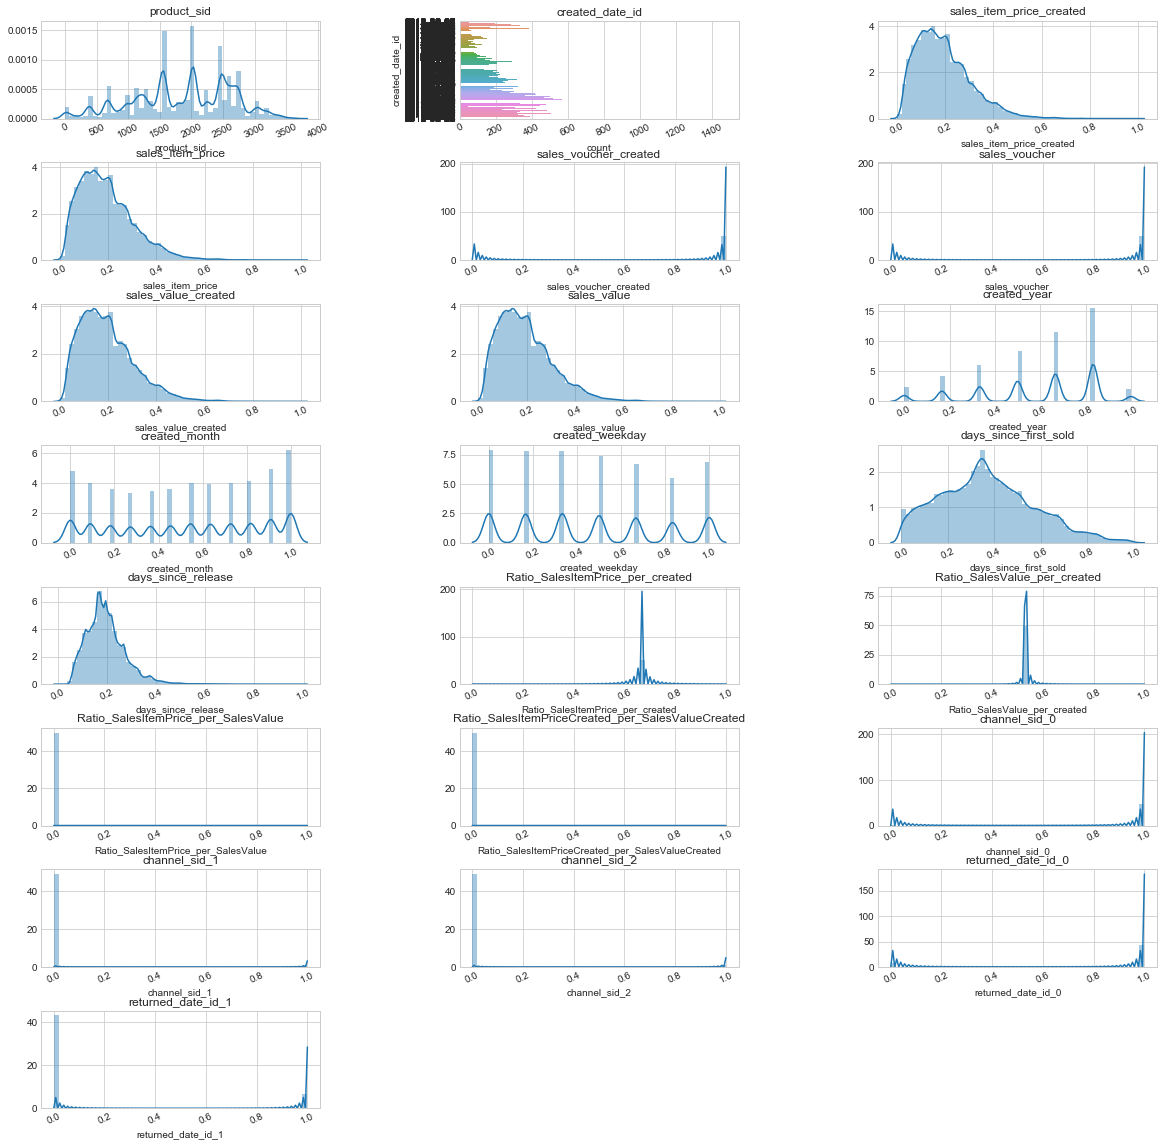

In [6]:

import math
import seaborn as sns

def plot_distribution(df1, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df1.shape[1]) / cols)
    for i, column in enumerate(df1.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df1.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df1)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df1[column])
            plt.xticks(rotation=25)
    
plot_distribution(df1, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)
plt.show()

Step 6: Autocorrelation plots are done below for a lag value of 24 time steps.

/Users/ananyaneogi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/Users/ananyaneogi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

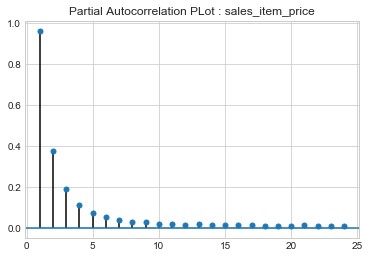

<Figure size 432x288 with 0 Axes>

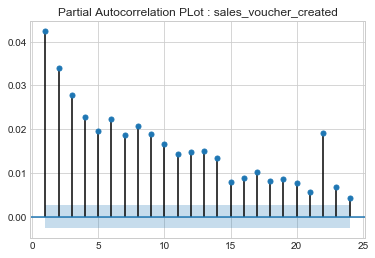

<Figure size 432x288 with 0 Axes>

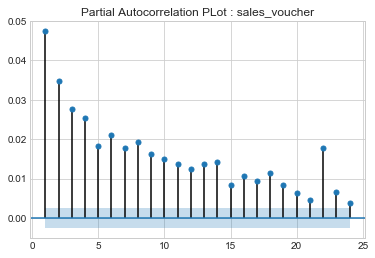

<Figure size 432x288 with 0 Axes>

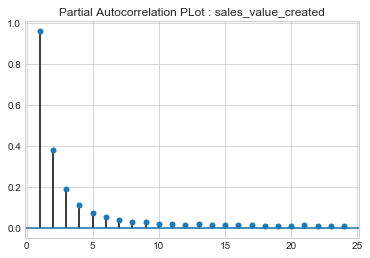

<Figure size 432x288 with 0 Axes>

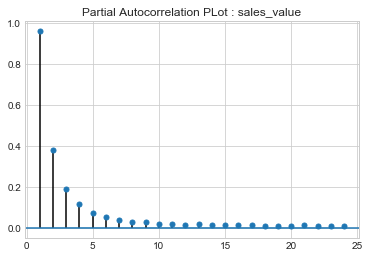

<Figure size 432x288 with 0 Axes>

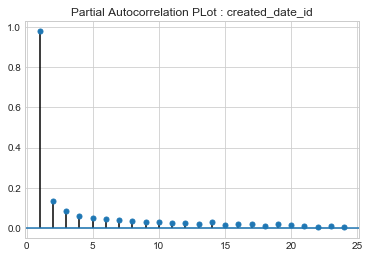

<Figure size 432x288 with 0 Axes>

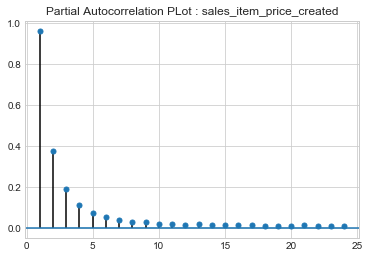

<Figure size 432x288 with 0 Axes>

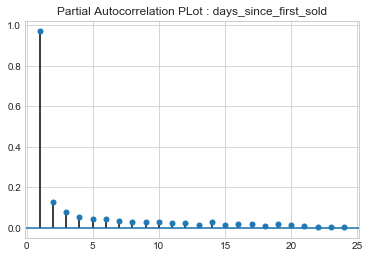

<Figure size 432x288 with 0 Axes>

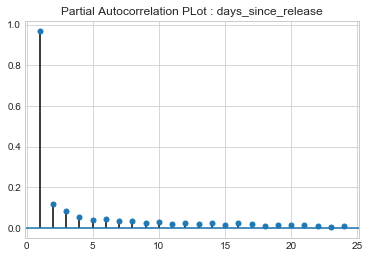

<Figure size 432x288 with 0 Axes>

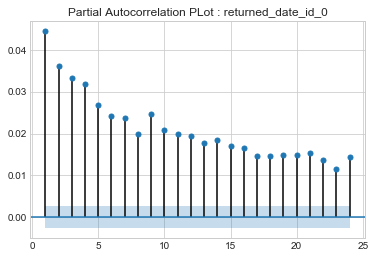

<Figure size 432x288 with 0 Axes>

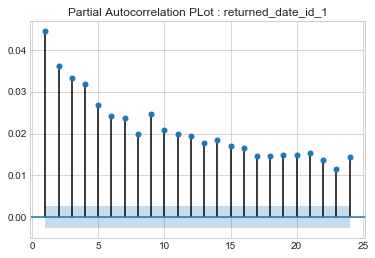

<Figure size 432x288 with 0 Axes>

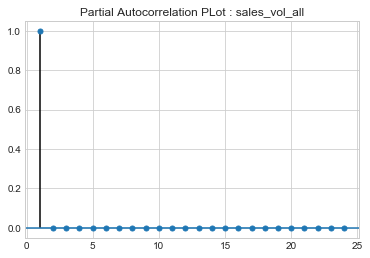

In [7]:

from statsmodels.graphics.tsaplots import plot_pacf

#columns = [] #use this for speedup
columns = ['sales_item_price', 'sales_voucher_created', 'sales_voucher',
       'sales_value_created', 'sales_value','created_date_id', 'sales_item_price_created',
       'days_since_first_sold', 'days_since_release', 'returned_date_id_0',
       'returned_date_id_1','sales_vol_all']

for col in columns:
    plt.figure()
    plot_pacf(df1_new[col].dropna(), lags=24, zero=False)
    plt.title("Partial Autocorrelation PLot : " + str(col))
    
plt.show()


Step 7: The function below helps to smoothen out the autocorrelation plot. Now the lag factor is for 24*7 time steps.

/Users/ananyaneogi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

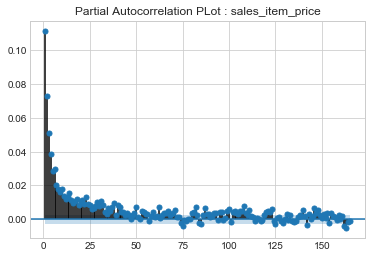

<Figure size 432x288 with 0 Axes>

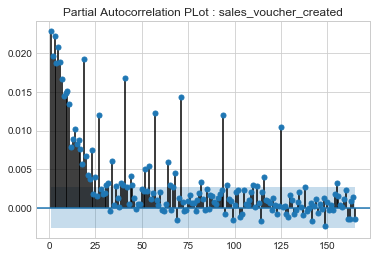

<Figure size 432x288 with 0 Axes>

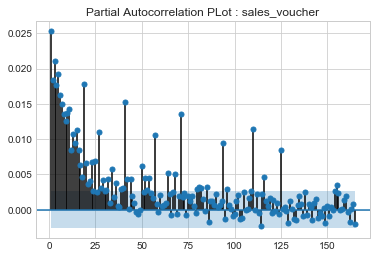

<Figure size 432x288 with 0 Axes>

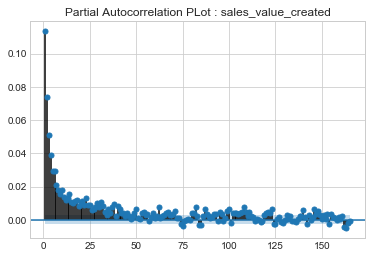

<Figure size 432x288 with 0 Axes>

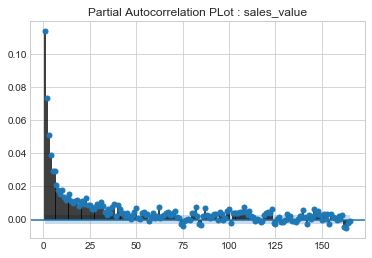

<Figure size 432x288 with 0 Axes>

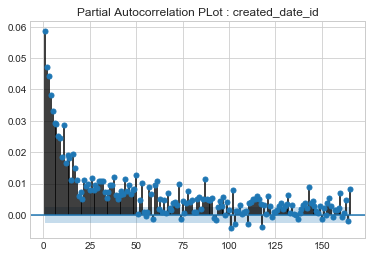

<Figure size 432x288 with 0 Axes>

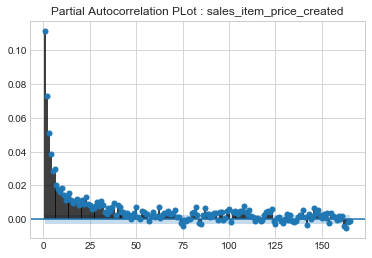

<Figure size 432x288 with 0 Axes>

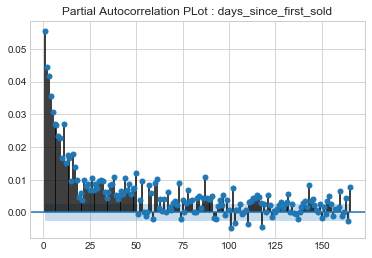

<Figure size 432x288 with 0 Axes>

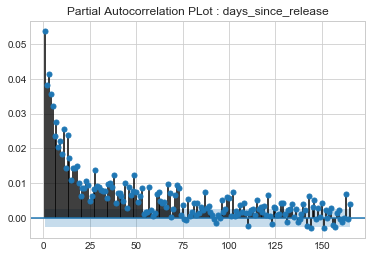

<Figure size 432x288 with 0 Axes>

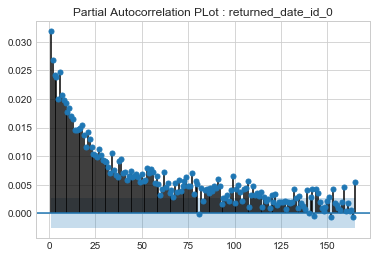

<Figure size 432x288 with 0 Axes>

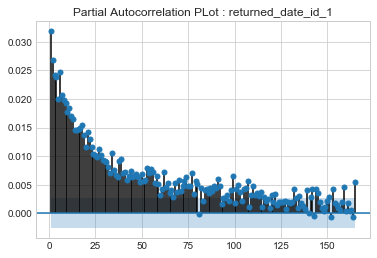

<Figure size 432x288 with 0 Axes>

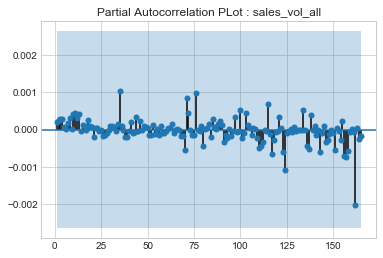

In [8]:

from statsmodels.graphics.tsaplots import _prepare_data_corr_plot, _plot_corr
import statsmodels.graphics.utils as utils
from statsmodels.tsa.stattools import pacf

def plot_pacf_drop(x, ax=None, lags=None, alpha=.05, method='ywunbiased',
              use_vlines=True, title='Partial Autocorrelation', zero=True,
              vlines_kwargs=None, drop_no=0, **kwargs):
    
    lags_orig=lags
    fig, ax = utils.create_mpl_ax(ax)
    vlines_kwargs = {} if vlines_kwargs is None else vlines_kwargs
    lags, nlags, irregular = _prepare_data_corr_plot(x, lags, zero)
    confint = None
    if alpha is None:
        acf_x = pacf(x, nlags=nlags, alpha=alpha, method=method)
    else:
        acf_x, confint = pacf(x, nlags=nlags, alpha=alpha, method=method)

    if drop_no:
        acf_x = acf_x[drop_no+1:]
        confint = confint[drop_no+1:]
        lags, nlags, irregular = _prepare_data_corr_plot(x, lags_orig-drop_no, zero)
        
    _plot_corr(ax, title, acf_x, confint, lags, False, use_vlines,
               vlines_kwargs, **kwargs)

    return fig

    import matplotlib.pyplot as plt

for col in columns:

    plt.figure()
    plot_pacf_drop(df1_new[col].dropna(), lags=24*7, drop_no=3, zero=False)
    plt.title("Partial Autocorrelation PLot : " + str(col))
    
plt.show()


Step 8: The dataset is split into training and test examples with a test size of 25%.  

In [9]:

X_train, X_valid, y_train, y_valid = train_test_split(df1.drop('created_date_id', axis = 1), df1_new["sales_vol_all"], test_size=0.25, random_state = 42, shuffle = False)


Step 9: The SegmentXYForecast function of the seglearn library helps to move the dataset across the 'FORECAST_DISTANCE' based on the given 'TIME_WINDOW'.

In [10]:

TIME_WINDOW=100
FORECAST_DISTANCE=24*7

from seglearn.transform import FeatureRep, SegmentXYForecast, last

segmenter = SegmentXYForecast(width=TIME_WINDOW, step=1, y_func=last, forecast=FORECAST_DISTANCE)

X_train_rolled, y_train_rolled,_=segmenter.fit_transform([X_train.values],[y_train])

X_train_rolled


/Users/ananyaneogi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


array([[[6.21000000e+02, 1.11813032e-01, 1.11813032e-01, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [6.21000000e+02, 1.11813032e-01, 1.11813032e-01, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [6.21000000e+02, 1.19057623e-01, 1.19057623e-01, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        ...,
        [6.21000000e+02, 3.35714389e-02, 3.35714389e-02, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [6.21000000e+02, 3.35714389e-02, 3.35714389e-02, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [6.21000000e+02, 5.45807555e-02, 5.45807555e-02, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00]],

       [[6.21000000e+02, 1.11813032e-01, 1.11813032e-01, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [6.21000000e+02, 1.19057623e-01, 1.19057623e-01, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [6.21000000e+02, 

Step 10: The training and validation sets are reshaped and rescaled which would be required while feeding into our models in the later stages.

In [11]:

X_train_rolled.shape

shape = X_train_rolled.shape
X_train_flattened = X_train_rolled.reshape(shape[0],shape[1]*shape[2])
X_train_flattened.shape


X_valid_rolled, y_valid_rolled,_=segmenter.fit_transform([X_valid.values],[y_valid])

shape = X_valid_rolled.shape
X_valid_flattened = X_valid_rolled.reshape(shape[0],shape[1]*shape[2])

print(X_valid_rolled[:1])
y_valid_rolled

[[[2.47300000e+03 1.98023675e-01 1.98023675e-01 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [2.47300000e+03 1.41515858e-01 1.41515858e-01 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [2.47300000e+03 1.90779083e-01 1.90779083e-01 ... 0.00000000e+00
   0.00000000e+00 1.00000000e+00]
  ...
  [2.47300000e+03 2.15410696e-01 2.15410696e-01 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [2.47300000e+03 1.83534492e-01 1.83534492e-01 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [2.47300000e+03 1.92228002e-01 1.92228002e-01 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]]]


array([4.15869786e-01, 4.15869786e-01, 4.15869786e-01, ...,
       2.03458800e-04, 0.00000000e+00, 0.00000000e+00])

Step 11: A function which would be used to evaluate the models that we build for our datasets is created.

In [12]:

from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from sklearn.exceptions import DataConversionWarning

def evaluate_model(model, X_valid, y_valid_true):
    predictions = model.predict(X_valid)
    rms = sqrt(mean_squared_error(y_valid_true, predictions))
    print("Root mean squared error on valid:",rms)
    return rms


Step 12: A 'Dummy Regressor' which is an inbuilt function of scikit learn is created to create a baseline.

In [13]:

from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy="mean", constant=None, quantile=None)

dummy_model.fit(X_train_flattened,y_train_rolled)

result = evaluate_model(dummy_model,X_valid_flattened,y_valid_rolled)


Root mean squared error on valid: 0.21482738525786882


Step 13: Defining and designing a XGBoost model and training it over our trainig and test sets.

In [16]:

import xgboost as xgb

# XGBoost needs it's custom data format to run quickly

dmatrix_train = xgb.DMatrix(data=X_train_flattened,label=y_train_rolled)
dmatrix_valid = xgb.DMatrix(data=X_valid_flattened,label=y_valid_rolled)

params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'n_estimators': 50}

evallist = [(dmatrix_valid, 'eval'), (dmatrix_train, 'train')]

num_round = 5 

xg_reg = xgb.train(params, dmatrix_train, num_round,evallist)

result = evaluate_model(xg_reg,dmatrix_valid,y_valid_rolled)


/Users/ananyaneogi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/xgboost/core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")
/Users/ananyaneogi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/xgboost/core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")


[0]	eval-rmse:0.320011	train-rmse:0.301289
[1]	eval-rmse:0.26592	train-rmse:0.244616
[2]	eval-rmse:0.23038	train-rmse:0.206339
[3]	eval-rmse:0.202974	train-rmse:0.180613
[4]	eval-rmse:0.193198	train-rmse:0.151107
Root mean squared error on valid: 0.19318722711739675


Step 14: Building a Recurrent Neural Network using LSTM for our dataset which would learn from the history of the sales trends of the products and forecast its corresponding sales volume for one week in the future.

In [19]:

LSTM_CELL_SIZE=512
BATCH_SIZE = 200
EPOCHS = 3
DROPOUT_RATE=0.2

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import backend as be
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

column_count=len(X_train.columns) #column count before rolling

be.clear_session()

# LSTM model built here!
model = Sequential()

model.add(LSTM(LSTM_CELL_SIZE, input_shape=(TIME_WINDOW,column_count),stateful=False))
model.add(Dense(1, activation= "linear"))


#For shape remeber, we have a variable defining the "window" and the features in the window. 
#Hence, thats what is to be used here.

model.compile(loss='mean_squared_error', optimizer='adam')

# Fit on the train data
# Using the necessary parameters 

history = model.fit(X_train_rolled, y_train_rolled, batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_data=(X_valid_rolled ,y_valid_rolled), shuffle=False)

Train on 410169 samples, validate on 136545 samples
Epoch 1/3
410169/410169 [==============================] - 3887s 9ms/step - loss: 0.0653 - val_loss: 0.1529
Epoch 2/3
410169/410169 [==============================] - 3951s 10ms/step - loss: 0.0291 - val_loss: 0.0951
Epoch 3/3
410169/410169 [==============================] - 4202s 10ms/step - loss: 0.0249 - val_loss: 0.0947


Step 15: Plot the losses observed while fitting the model on the training and test data.

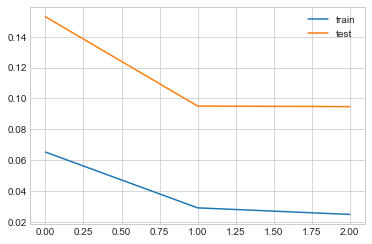

In [20]:
# Plot the loss function of training and test sets
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Step 16: Use the evaluate function to test the RMS error value and compare the same to the other models.

In [21]:
result = evaluate_model(model,X_valid_rolled ,y_valid_rolled)

Root mean squared error on valid: 0.3077364148359115


# Function to generate predictions

This helper-function plots the predicted and true output-signals.

In [26]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = X_train
        y_true = y_train
    else:
        # Use test-data.
        x = X_test
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = df1_new['sales_vol_all']
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

Plotting the time sampled data of sales volume for all products across their creation dates

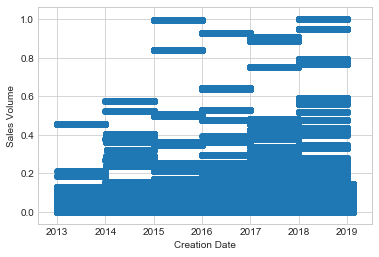

In [29]:
plt.scatter(df1_new['created_date_id'], df1_new['sales_vol_all'])
plt.xlabel("Creation Date")
plt.ylabel("Sales Volume")
plt.show()